# Movie Lens 100K EDA
## Import Libraries

In [96]:
import numpy as np
import pandas as pd


import seaborn as sns # For Graphing Data
import matplotlib.pyplot as plt

## Loading and Inspecting the Data
### Load the Datasets

In [97]:
file_path_ratings = 'Dataset/ratings.csv'
file_path_movies = 'Dataset/movies.csv'

df_ratings = pd.read_csv(file_path_ratings)
df_movies = pd.read_csv(file_path_movies)

### Check for null values and get general info

In [98]:
print("Info for Ratings Dataframe: ")
print(df_ratings.info())
print("\nInfo for Movies Dataframe: ")
print(df_movies.info())

Info for Ratings Dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Info for Movies Dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [99]:
print(f"Null Count for Ratings Dataframe: \n{df_ratings.isnull().sum()}\n")
print(f"Null Count for Movies Dataframe: \n{df_movies.isnull().sum()}")

Null Count for Ratings Dataframe: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Null Count for Movies Dataframe: 
movieId    0
title      0
genres     0
dtype: int64


There are **no missing values** in either dataset.

### General Statistics

In [100]:
print("---ratings.csv statistics---")
print(f"Unique Users: {df_ratings['userId'].nunique()}")
print(f"Unique Movies from Ratings Dataframe: {df_ratings['movieId'].nunique()}")
print(f"Total Ratings: {len(df_ratings)}\n")

print("---movies.csv statistics---")
print(f"Unique Movies from Movies Dataframe: {df_movies['movieId'].nunique()}")
print(f"Unique Titles: {df_movies['title'].nunique()}")
print(f"Total Movies: {len(df_movies)}")

---ratings.csv statistics---
Unique Users: 610
Unique Movies from Ratings Dataframe: 9724
Total Ratings: 100836

---movies.csv statistics---
Unique Movies from Movies Dataframe: 9742
Unique Titles: 9737
Total Movies: 9742


Cannot see the number of unique genres because they need to be processed first. Current form example: Adventure|Animation|Children|Comedy|Fantasy 

## Ratings Data Analysis

In [101]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


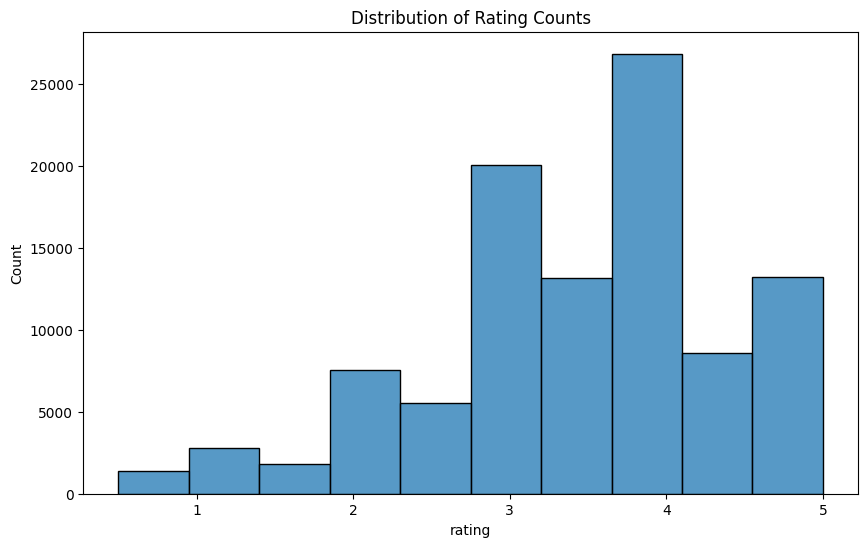

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ratings['rating'], bins=10, kde=False)
plt.title('Distribution of Rating Counts')
plt.show()

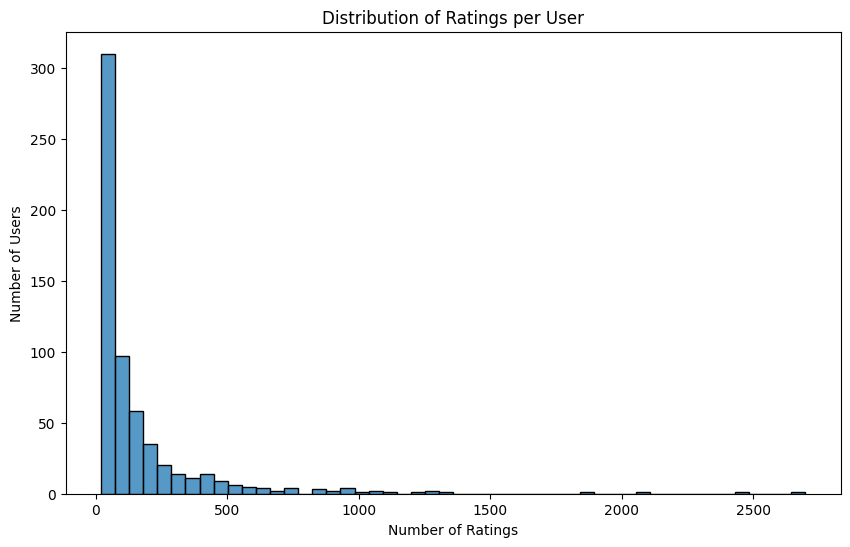

In [103]:
ratings_per_user = df_ratings['userId'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(data=ratings_per_user, bins=50)
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

Some users have submitted over 2000 movie ratings. These outliers could either be useful(someone who watches a lot of movies) or spam.

## Movie Data Analysis

In [104]:
duplicates = df_movies[df_movies['title'].duplicated(keep=False)]
duplicates

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


There are only a few duplicates so they can be merged manually. Since there are discrepancies in the genre tags, I would recommend finding out these movie genres manually and updating the data. The duplicate can then be discarded.

In [105]:
genre_split = df_movies['genres'].str.split('|')
flattened_genre_split = [item for sublist in genre_split for item in sublist]
unique_genres = set(flattened_genre_split)
unique_genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [112]:
print(f"Number of Unique Genres (including '(no genres listed)': \n{len(unique_genres)}")

Number of Unique Genres (including '(no genres listed)': 
20


In [106]:
genre_split = genre_split.to_frame()
df_genres = genre_split.reindex(genre_split.columns.tolist() + list(unique_genres), axis=1, fill_value=0)
df_genres.head()

,genres,Action,Animation,(no genres listed),Children,Adventure,Fantasy,Horror,Western,Film-Noir,...,Romance,Sci-Fi,Comedy,Drama,War,IMAX,Documentary,Musical,Thriller,Mystery
0,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Adventure, Children, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[Comedy, Romance]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama, Romance]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[Comedy],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
genre_split.head()

,genres
0,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,"[Adventure, Children, Fantasy]"
2,"[Comedy, Romance]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]


In [108]:
for idx, genre_list in enumerate(genre_split['genres']):
    for genre in genre_list:
        df_genres.loc[idx, genre] = 1

df_genres.head()

,genres,Action,Animation,(no genres listed),Children,Adventure,Fantasy,Horror,Western,Film-Noir,...,Romance,Sci-Fi,Comedy,Drama,War,IMAX,Documentary,Musical,Thriller,Mystery
0,"[Adventure, Animation, Children, Comedy, Fantasy]",0,1,0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,"[Adventure, Children, Fantasy]",0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[Comedy, Romance]",0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,"[Comedy, Drama, Romance]",0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
4,[Comedy],0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [109]:
df_genres = df_genres.drop(['genres'], axis=1)
df_movies = df_movies.drop(['genres'], axis=1)

In [110]:
df_movies = pd.concat([df_movies, df_genres], axis=1)
df_movies.head()

,movieId,title,Action,Animation,(no genres listed),Children,Adventure,Fantasy,Horror,Western,...,Romance,Sci-Fi,Comedy,Drama,War,IMAX,Documentary,Musical,Thriller,Mystery
0,1,Toy Story (1995),0,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Summary
### Observations
* No null-values
* Some movie title duplicates exist in movies.csv
### Recommendations
* Multi-hot encoding to represent genres
* Manually fix duplicate discrepancies and discard unused duplicates.
* Removing the year from the movie titles and possibly making a separate feature just for the movie years.